In [1]:
!pip install yellowbrick

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [3]:
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
diabetes = pd.read_csv('datasets/diabetes.csv')

In [6]:
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
diabetes_corr = diabetes.corr()

diabetes_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


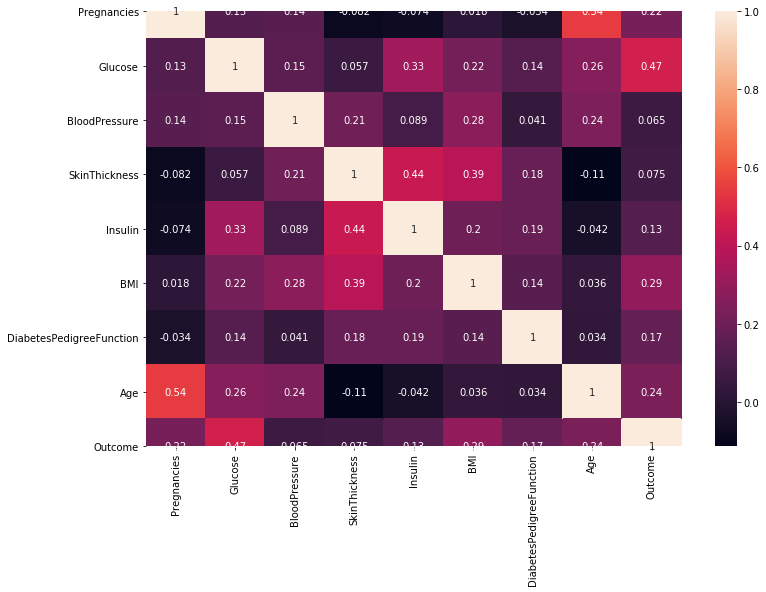

In [8]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(diabetes_corr, annot=True)
plt.show()

In [9]:
X = diabetes[['Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction']]
Y = diabetes['Age']

In [10]:
features_name = X.columns

features_name

Index(['Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction'], dtype='object')

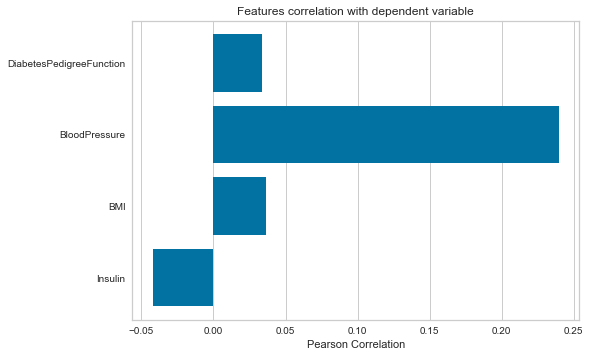

In [13]:
from yellowbrick.target import FeatureCorrelation

visualizer = FeatureCorrelation(labels=features_name, method='pearson')
visualizer.fit(X, Y)
visualizer.poof()

In [14]:
score_df = pd.DataFrame({'Feature_name': visualizer.features_,
                         'Scores': visualizer.scores_})
score_df

,Feature_name,Scores
0,Insulin,-0.042163
1,BMI,0.036242
2,BloodPressure,0.239528
3,DiabetesPedigreeFunction,0.033561


In [15]:
X = diabetes.drop('Outcome', axis=1)

Y = diabetes['Outcome']

In [16]:
features_name = X.columns

features_name

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

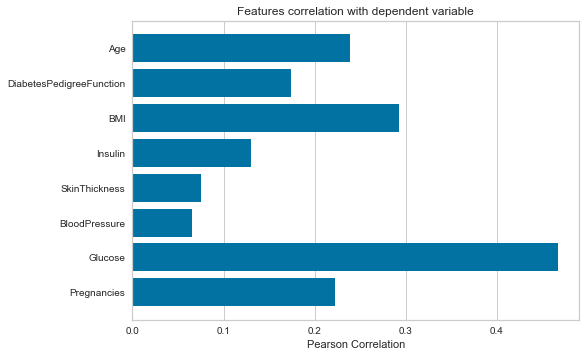

In [17]:
visualizer = FeatureCorrelation(labels=features_name, method='pearson')
visualizer.fit(X, Y)
visualizer.poof()

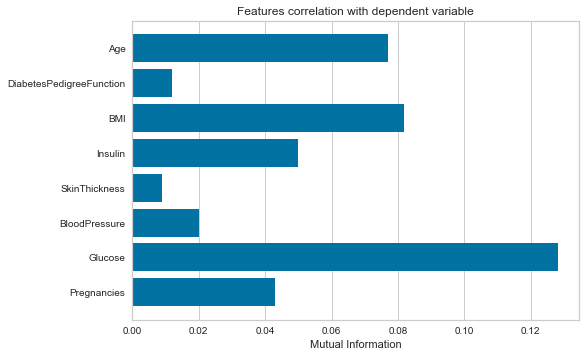

In [18]:
# mutual correlation
discrete_features = [False for _ in range(len(features_name))]
discrete_features[0] = True

visualizer = FeatureCorrelation(labels=features_name, method='mutual_info-classification')
visualizer.fit(X, Y, discrete_features=discrete_features, random_state=0)
visualizer.poof()